In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",50)

In [3]:
df = pd.read_excel('http://www.tos.ohio.gov/Documents/Transparency/2014-State-Salaries.xlsx', sheetname='Sheet2')

In [4]:
df.head()

,Agency/Department,Job Title,Name,Hourly Rate,Overtime,Total Gross
0,Accountancy Board,Investigator,"OTTAVI,FAITH A",28.27,NaN,58462.45
1,Accountancy Board,Accountancy Board Exec Directo,"PATTERSON,JOHN E",57.95,NaN,120647.15
2,Accountancy Board,Administrative Professional 1,"RAGER,LUANN",19.38,NaN,40304.00
3,Accountancy Board,Investigation Supervisor 2,"DIXON,JESSE J",29.89,NaN,49545.02
4,Accountancy Board,Administrative Professional 1,"NEWELL,ELISABETH A",18.98,NaN,39181.63


In [8]:
df.columns = [col.replace(' ','_').replace('/','_') for col in df.columns]

In [9]:
df.head()

,Agency_Department,Job_Title,Name,Hourly_Rate,Overtime,Total_Gross
0,Accountancy Board,Investigator,"OTTAVI,FAITH A",28.27,NaN,58462.45
1,Accountancy Board,Accountancy Board Exec Directo,"PATTERSON,JOHN E",57.95,NaN,120647.15
2,Accountancy Board,Administrative Professional 1,"RAGER,LUANN",19.38,NaN,40304.00
3,Accountancy Board,Investigation Supervisor 2,"DIXON,JESSE J",29.89,NaN,49545.02
4,Accountancy Board,Administrative Professional 1,"NEWELL,ELISABETH A",18.98,NaN,39181.63


In [30]:
df.fillna(value=0, inplace=True)

In [31]:
pd.pivot_table(df, index='Agency_Department', values='Total_Gross', aggfunc='median').sort_values(ascending=False)

Agency_Department
Inspector General                           71582.425
Environmental Protection                    69762.795
Aging                                       69166.630
Medicaid                                    68993.585
Insurance                                   68907.200
Ohio Public Works Commission                68864.410
Public Utility Commission                   68063.270
Employee Relations Board                    64480.000
Education                                   64177.410
Judiciary                                   63179.760
Commission on Minority Health               62937.330
School Facilities Commission                62769.040
Consumers Counsel                           62255.430
Health                                      62083.480
Commission Service Volunteer                61921.735
Administrative Services                     61412.570
Pharmacy Board                              61234.250
Joint Legis Ethics Committee                60621.715
Environmen

In [32]:
df.sort_values(by='Hourly_Rate', ascending=False)

,Agency_Department,Job_Title,Name,Hourly_Rate,Overtime,Total_Gross
3868,Workers Compensation,Board Member,"LEHECKA,STEPHEN E",2500.000000,0.0,60000.00
6013,Casino Control Commission,Board/Commission Member 4,"Lucas,Will",2500.000000,0.0,52500.00
3870,Workers Compensation,Board Member,"PALMER,MARK J",2500.000000,0.0,60000.00
3863,Workers Compensation,Board Member,"GRIFFITH,PEGGY",2500.000000,0.0,60000.00
5967,Casino Control Commission,Board/Commission Member 4,"Steinhauer,John S",2500.000000,0.0,52500.00
3867,Workers Compensation,Board Member,"ZUK,NICHOLAS W",2500.000000,0.0,60000.00
5966,Casino Control Commission,Board/Commission Member 4,"Manoranjan,Ranjan",2500.000000,0.0,52500.00
3865,Workers Compensation,Board Member,"CALDWELL,DAVID L",2500.000000,0.0,60000.00
3862,Workers Compensation,Board Member,"GUGLIELMI,FRANK A",2500.000000,0.0,60000.00
3869,Workers Compensation,Board Member,"STOKES,DEWEY R",2500.000000,0.0,60000.00


In [40]:
df = df.assign(Hours = (df.Total_Gross - df.Overtime)/df.Hourly_Rate, 
          Days=((df.Total_Gross - df.Overtime)/df.Hourly_Rate)/8).sort_values(by='Hourly_Rate', ascending=False)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59408 entries, 3868 to 52020
Data columns (total 8 columns):
Agency_Department    59408 non-null object
Job_Title            59408 non-null object
Name                 59408 non-null object
Hourly_Rate          59408 non-null float64
Overtime             59408 non-null float64
Total_Gross          59408 non-null float64
Days                 59408 non-null float64
Hours                59408 non-null float64
dtypes: float64(5), object(3)
memory usage: 4.1+ MB


In [49]:
pd.pivot_table(df.query("Days >= 200"), index='Agency_Department', values='Hourly_Rate', aggfunc='median').sort_values(ascending=False)

Agency_Department
Consumers Counsel                           40.870000
Insurance                                   37.670000
Board of Dietetics                          37.055000
Aging                                       36.930000
Medicaid                                    36.240000
Judiciary                                   35.820000
Public Utility Commission                   35.770000
Orthotic Prosthetic Pedorthics              35.570000
Education                                   35.320000
Employee Relations Board                    34.875000
Inspector General                           34.620000
Pharmacy Board                              34.240000
Board of Nursing                            34.040000
Arts Council                                33.930000
Environmental Protection                    33.930000
Board of Proprietary School Registration    33.405000
Lake Erie Commission                        33.330000
Ohio Public Works Commission                33.300000
Health    

In [56]:
df.query("Days >= 200 & Agency_Department == 'Mental Health'").describe()

,Hourly_Rate,Overtime,Total_Gross,Days,Hours
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,28.590127,3628.355884,62936.092783,258.371119,2066.968951
std,14.693278,10323.288239,35276.798661,15.492686,123.941491
min,13.440000,0.000000,22149.370000,200.191160,1601.529280
25%,17.460000,0.000000,39598.052500,255.062265,2040.498117
50%,24.730000,1160.710000,53063.760000,259.728270,2077.826163
75%,35.297500,3808.137500,76060.807500,264.362308,2114.898464
max,102.470000,218432.500000,394704.940000,487.341155,3898.729244


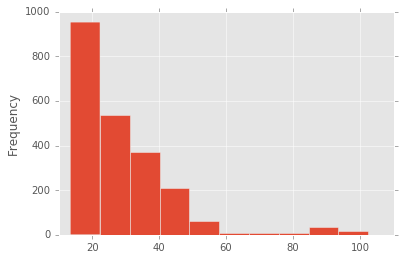

In [59]:
df.query("Days >= 200 & Agency_Department == 'Mental Health'").Hourly_Rate.plot.hist()

In [47]:
df.query("Days >= 200").sort_values(by='Hourly_Rate', ascending=False)

,Agency_Department,Job_Title,Name,Hourly_Rate,Overtime,Total_Gross,Days,Hours
29731,Rehabilitation and Corrections,Physician Administrator 3,"EDDY,ANDREW D",139.000000,0.00,290514.50,261.254047,2090.032374
29800,Rehabilitation and Corrections,Physician Administrator 3,"BURNS HILL,KATHRYN ANN",122.000000,0.00,222868.38,228.348750,1826.790000
9217,Mental Health,Psychiatrist,"HAMILL,JOHN MARK",102.470000,84272.50,301954.30,265.543330,2124.346638
9107,Mental Health,Physician Administrator 3,"MCGEE,MARK F",101.350000,0.00,205933.01,253.987432,2031.899457
9216,Mental Health,Psychiatrist,"SIERRA,MAIDA",99.740000,0.00,203551.02,255.102040,2040.816322
29787,Rehabilitation and Corrections,Physician Administrator 3,"DURNER,CHRISTOPHER MICHAEL",98.560000,0.00,205004.80,260.000000,2080.000000
29773,Rehabilitation and Corrections,Physician Administrator 3,"KRISHER,GARY EDWARD",98.560000,0.00,205514.43,260.646345,2085.170759
36048,Rehabilitation and Corrections,Physician Administrator 3,"WEIL,DAVID CHARLES",98.560000,0.00,208819.10,264.837536,2118.700284
39313,Rehabilitation and Corrections,Physician Administrator 2,"HALE,ARTHUR LEWELLEN",98.550000,0.00,202041.02,256.267149,2050.137189
36582,Rehabilitation and Corrections,Physician Administrator 2,"SAUL,KENNETH WAYNE",98.550000,0.00,192120.02,243.683435,1949.467478
